In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/data/archive.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive')

In [7]:
pip install keras tensorflow

In [8]:
import tensorflow as tf
print(tf.keras.__version__)


3.8.0


Training set: (17000, 28, 28, 1), Labels: (17000, 10)
Testing set: (3000, 28, 28, 1), Labels: (3000, 10)


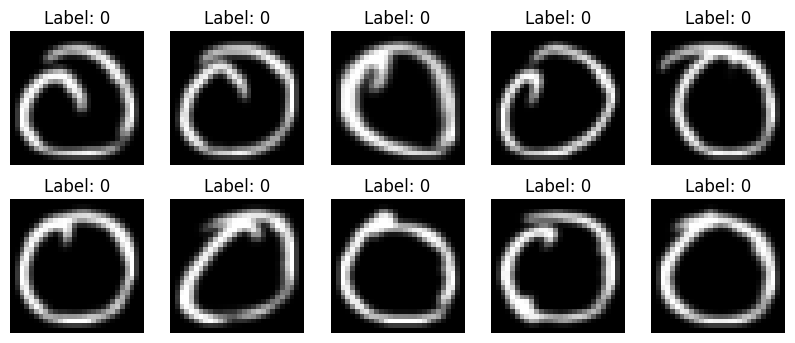

In [35]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image  # Import Pillow for image processing

# Define dataset paths
train_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/DevanagariHandwrittenDigitDataset/Train"
test_dir = "/content/drive/MyDrive/DevanagariHandwrittenDigitDataset/DevanagariHandwrittenDigitDataset/Test"

# Define image size
img_height, img_width = 28, 28

# Function to load images and labels using PIL
def load_images_from_folder(folder):
    images = []
    labels = []
    class_names = sorted(os.listdir(folder))  # Sorted class names (digit_0, digit_1, ...)
    class_map = {name: i for i, name in enumerate(class_names)}  # Map class names to labels

    for class_name in class_names:
        class_path = os.path.join(folder, class_name)
        label = class_map[class_name]
        for filename in os.listdir(class_path):
            img_path = os.path.join(class_path, filename)
            # Load image using PIL
            img = Image.open(img_path).convert("L")  # Convert to grayscale
            img = img.resize((img_width, img_height))  # Resize to (28, 28)
            img = np.array(img) / 255.0  # Normalize pixel values to [0, 1]
            images.append(img)
            labels.append(label)

    return np.array(images), np.array(labels)

# Load training and testing datasets
x_train, y_train = load_images_from_folder(train_dir)
x_test, y_test = load_images_from_folder(test_dir)

# Reshape images for Keras input
x_train = x_train.reshape(-1, img_height, img_width, 1)  # Shape (num_samples, 28, 28, 1)
x_test = x_test.reshape(-1, img_height, img_width, 1)

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Print dataset shape
print(f"Training set: {x_train.shape}, Labels: {y_train.shape}")
print(f"Testing set: {x_test.shape}, Labels: {y_test.shape}")

# Visualize some images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {np.argmax(y_train[i])}")
    plt.axis("off")
plt.show()

In [14]:
# import numpy as np
# import tensorflow as tf
# from tensorflow.keras import layers, models
# from tensorflow.keras.datasets import mnist
# # Load the MNIST dataset
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
# # Normalize the images to values between 0 and 1
# x_train, x_test = x_train / 255.0, x_test / 255.0
# # Flatten the 28x28 images into 784-dimensional vectors
# x_train = x_train.reshape(-1, 28 * 28)
# x_test = x_test.reshape(-1, 28 * 28)
# # One-hot encode the labels (0-9) for classification
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [36]:
# Model parameters
import tensorflow as tf
from tensorflow import keras
num_classes = 10
input_shape = (28, 28, 1)
model = keras.Sequential(
[
keras.layers.Input(shape=input_shape),
keras.layers.Flatten(), # Flatten the 28x28 image to a 784-dimensional vector
keras.layers.Dense(64, activation="sigmoid"),
keras.layers.Dense(128, activation="sigmoid"),
keras.layers.Dense(256, activation="sigmoid"),
keras.layers.Dense(num_classes, activation="softmax"),
]
)

In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Import TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
# Define model parameters
num_classes = 10
input_shape = (28, 28, 1)
# Function to build the functional model
def build_functional_model():
    # Input layer
    inputs = keras.Input(shape=input_shape)
    # Flatten layer
    x = keras.layers.Flatten()(inputs)
    # Hidden layers with sigmoid activation
    x = keras.layers.Dense(64, activation="sigmoid")(x)
    x = keras.layers.Dense(128, activation="sigmoid")(x)
    x = keras.layers.Dense(256, activation="sigmoid")(x)
    # Output layer with softmax activation
    outputs = keras.layers.Dense(num_classes, activation="softmax")(x)
    # Create and return the model
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model
# Build the model
functional_model = build_functional_model()
# Display the model summary
functional_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [40]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.1196 - loss: 2.2638 - val_accuracy: 0.0000e+00 - val_loss: 4.0248
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1194 - loss: 2.1891 - val_accuracy: 0.0000e+00 - val_loss: 4.4548
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1276 - loss: 2.1839 - val_accuracy: 0.0000e+00 - val_loss: 4.7004
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1294 - loss: 2.1841 - val_accuracy: 0.0000e+00 - val_loss: 4.9222
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.1250 - loss: 2.1796 - val_accuracy: 0.0000e+00 - val_loss: 5.0322


In [26]:
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4),
]

In [30]:
model.compile(
optimizer="sgd", # Stochastic Gradient Descent
loss="categorical_crossentropy", # Loss function for multi-class classification
metrics=["accuracy"] # Track accuracy during training
)

In [41]:
batch_size = 128
epochs = 2000
# Callbacks
callbacks = [
keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
keras.callbacks.EarlyStopping(monitor="val_loss", patience=4 ),
]
# Train the model with callbacks and validation split
history = model.fit(
x_train,
y_train,
batch_size=batch_size,
epochs=epochs,
validation_split=0.15,
callbacks=callbacks,
)

Epoch 1/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1401 - loss: 2.1799 - val_accuracy: 0.0000e+00 - val_loss: 5.1645
Epoch 2/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1381 - loss: 2.1786 - val_accuracy: 0.0000e+00 - val_loss: 5.2572
Epoch 3/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1304 - loss: 2.1771 - val_accuracy: 0.0000e+00 - val_loss: 5.3536
Epoch 4/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.1422 - loss: 2.1778 - val_accuracy: 0.0000e+00 - val_loss: 5.4345
Epoch 5/2000
113/113 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.1544 - loss: 2.1748 - val_accuracy: 0.0000e+00 - val_loss: 5.5111


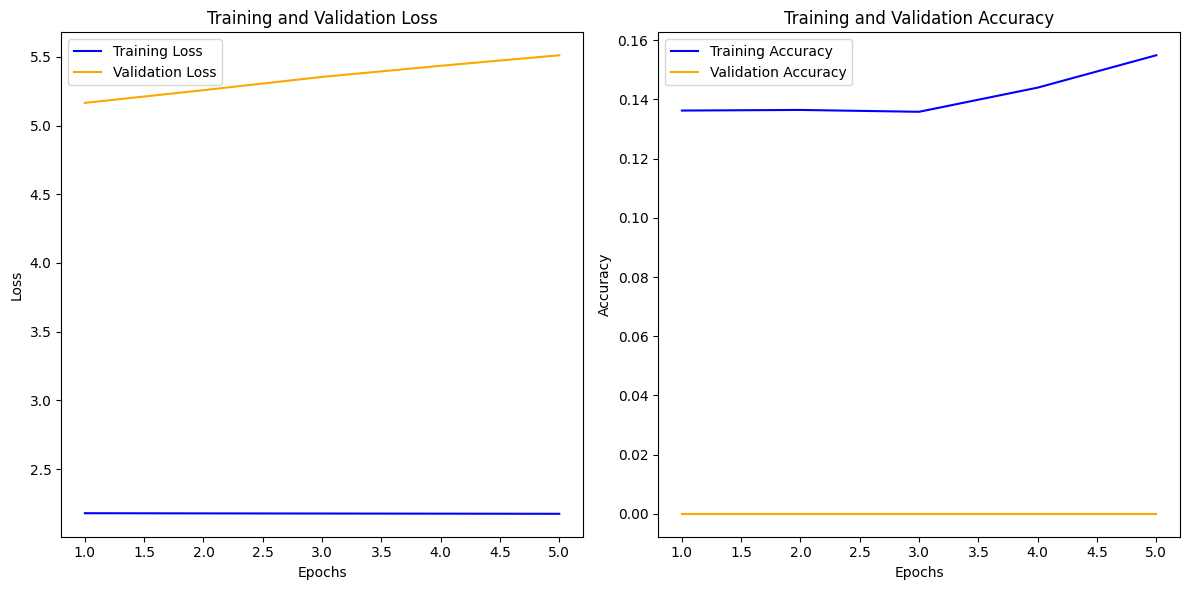

In [42]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# Assuming 'history' is the object returned by model.fit()
# Extracting training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']
# Extracting training and validation accuracy (if metrics were specified)
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
# Plotting training and validation loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(train_loss) + 1), train_loss, label='Training Loss', color='blue')
plt.plot(range(1, len(val_loss) + 1), val_loss, label='Validation Loss', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
# Plotting training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy', color='blue')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()



In [43]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc:.4f}")

94/94 - 0s - 3ms/step - accuracy: 0.1143 - loss: 2.6745
Test accuracy: 0.1143


In [44]:
# Predict on test data
predictions = model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 5
True label for first image: 0


In [45]:
model.save('mnist_fully_connected_model.h5')

In [46]:
loaded_model = tf.keras.models.load_model('/content/mnist_fully_connected_model.h5')

# Compile the loaded model
loaded_model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [47]:
# Predict on test data
predictions = loaded_model.predict(x_test)
# Convert predictions from probabilities to digit labels
predicted_labels = np.argmax(predictions, axis=1)
# Check the first prediction
print(f"Predicted label for first image: {predicted_labels[0]}")
print(f"True label for first image: {np.argmax(y_test[0])}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted label for first image: 5
True label for first image: 0
